<a href="https://colab.research.google.com/github/MiggieCS911/DrugRepuposingSGLT2i/blob/main/TraditionalMachineLearningSGLT2_show.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI for drug/block_SGLT2/data/sglt2i_fpdf_dropduplicates.csv')

In [ ]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,molecule_chembl_id,canonical_smiles,standard_value,assay_chembl_id,bioactivity,Molecular_Wt,LogP,HDonor,HAcceptor,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CHEMBL183937,Cc1cc(O)c(C(=O)CCc2ccc3occc3c2)c(O[C@@H]2O[C@H...,11.0,CHEMBL863286,active,458.463,1.44102,5,9,7.958607
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CHEMBL371448,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,491.0,CHEMBL863286,inactive,454.479,1.58142,5,8,6.308919
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CHEMBL382302,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,458.0,CHEMBL863286,inactive,456.495,0.77012,5,8,6.339135
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CHEMBL382319,CCc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H...,532.0,CHEMBL863286,inactive,470.522,1.02410,5,8,6.274088
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CHEMBL200608,Cc1cc(O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]...,754.0,CHEMBL863286,inactive,470.522,0.78052,4,9,6.122629


In [ ]:
df.shape

(1277, 891)

In [ ]:
df.columns[-10:]

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'assay_chembl_id', 'bioactivity', 'Molecular_Wt', 'LogP', 'HDonor',
       'HAcceptor', 'pIC50'],
      dtype='object')

# Classify Bioactivity

In [ ]:
map_bioactivity = { 'inactive': 0, 'active': 1}

df['bioactivity'] = df['bioactivity'].map(map_bioactivity)

In [ ]:
X = df.drop([ 'molecule_chembl_id',
       'canonical_smiles', 'standard_value', 'assay_chembl_id', 'bioactivity',
       'Molecular_Wt', 'LogP', 'HDonor', 'HAcceptor', 'pIC50'], axis=1)

In [ ]:
X.shape

(1277, 881)

In [ ]:
y = df['bioactivity']
y.shape

(1277,)

# train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=911)

# Predict class of Bioactivity

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# randomserachcv
#seed
np.random.seed(911)
param_dict = {
    'bootstrap':[True],
    'max_depth': [10,20,30,50,100,200],
    'min_samples_split': [4,8,12,20,30],
    'min_samples_leaf': [4,8,12,20,30],
    'n_estimators': [100,200,300,400],
    'max_features': [2,4,6,8]
}
rf = RandomForestClassifier(
    class_weight = 'balanced'
)

gridrf = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_dict,
    cv = 10,
    n_iter = 100,
    random_state = 12345,
    n_jobs = -1,
    verbose = 2
)

%time gridrf.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
CPU times: user 5.99 s, sys: 256 ms, total: 6.25 s
Wall time: 2min 38s


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 50, 100, 200],
                                        'max_features': [2, 4, 6, 8],
                                        'min_samples_leaf': [4, 8, 12, 20, 30],
                                        'min_samples_split': [4, 8, 12, 20, 30],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=12345, verbose=2)

In [ ]:
gridrf.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=100, max_features=8,
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=400)

In [ ]:
gridrf.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 400}

In [ ]:
gridrf.best_score_

0.7806301161241195

In [ ]:
y_pred_rf =  gridrf.predict(X_test)

print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[ 82  42]
 [ 17 115]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       124
           1       0.73      0.87      0.80       132

    accuracy                           0.77       256
   macro avg       0.78      0.77      0.77       256
weighted avg       0.78      0.77      0.77       256



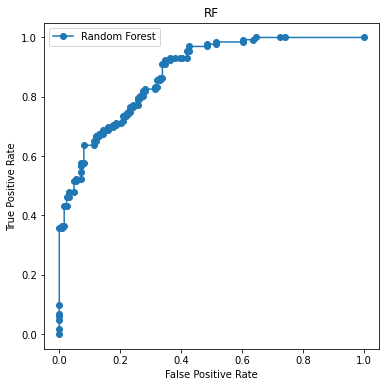

ROC AUC of RF: 0.8796432062561095


In [ ]:
y_predictProb_rf = gridrf.predict_proba(X_test)
y_predictProb_rf = y_predictProb_rf[:,1]

fpr_rf, tpr_rf, _ = roc_curve(y_test,y_predictProb_rf)

#plot graph
plt.figure(figsize=(6,6))
plt.plot(fpr_rf,tpr_rf, marker='o', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF')
plt.legend()
# plt.savefig('/content/drive/MyDrive/AI for drug/block_SGLT2/results/RF_AUC.jpg', dpi = 800)
plt.show()
# plt.savefig('/content/drive/MyDrive/AI for drug/block_SGLT2/results/RF_AUC.jpg', dpi = 800)
print(f'ROC AUC of RF: {roc_auc_score(y_test,y_predictProb_rf)}')

In [ ]:
np.random.seed(911)
rf = RandomForestClassifier(
    class_weight = 'balanced',
    bootstrap = True,
    max_depth = 100,
    max_features = 8,
    min_samples_leaf = 4,
    min_samples_split = 8,
    n_estimators = 400,
    # random_state=12345,
).fit(X_train,y_train)

In [ ]:
y_pred_rf =  rf.predict(X_test)

print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[ 82  42]
 [ 17 115]]
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       124
           1       0.73      0.87      0.80       132

    accuracy                           0.77       256
   macro avg       0.78      0.77      0.77       256
weighted avg       0.78      0.77      0.77       256



In [ ]:
import pickle
# filename = '/content/drive/MyDrive/AI for drug/block_SGLT2/results/RFmodel_dropduplicates_bioactivity_class.sav'
# pickle.dump(rf, open(filename, 'wb'))

## XGBoost

In [ ]:
!pip install xgboost==1.3.3

     |████████████████████████████████| 157.5 MB 21 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
# from sklearn.metrics import make_scorer
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
np.random.seed(911)

# create a default XGBoost classifier
xgbc = xgb.XGBClassifier(
    tree_method = 'gpu_hist',
    random_state=12345, 
    eval_metric=["error", "auc"]
)
# Create the grid search parameter grid and scoring funcitons
param_grid = {
    "learning_rate": [0.1, 0.05, 0.02],
    "colsample_bytree": [0.4, 0.6, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [ 8,10,12,16,20,24],
    "n_estimators": [100, 200, 300,400,500],
    "reg_lambda": [1, 1.5, 2],
    "gamma": [0, 0.1, 0.3],
}
scoring = {
    'AUC': 'roc_auc', 
    'Accuracy': make_scorer(accuracy_score)
}
# create the Kfold object
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds)
# create the grid search object
n_iter=50
grid_xgb = RandomizedSearchCV(
    estimator=xgbc, 
    param_distributions=param_grid,
    cv=kfold,
    random_state=12345,
    scoring=scoring,
    n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
)
# fit grid search
%time xgb_best = grid_xgb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


CPU times: user 20.6 s, sys: 1.67 s, total: 22.2 s
Wall time: 40min 12s


In [ ]:
xgb_best.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              eval_metric=['error', 'auc'], gamma=0.3, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=4, num_parallel_tree=1,
              random_state=12345, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.6, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [ ]:
xgb_best.best_score_

0.8995131967515688

In [ ]:
xgb_best.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0.3,
 'learning_rate': 0.02,
 'max_depth': 20,
 'n_estimators': 400,
 'reg_lambda': 1,
 'subsample': 0.6}

In [ ]:
y_pred_xgb = xgb_best.predict(X_test)

print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[ 87  37]
 [ 11 121]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       124
           1       0.77      0.92      0.83       132

    accuracy                           0.81       256
   macro avg       0.83      0.81      0.81       256
weighted avg       0.82      0.81      0.81       256



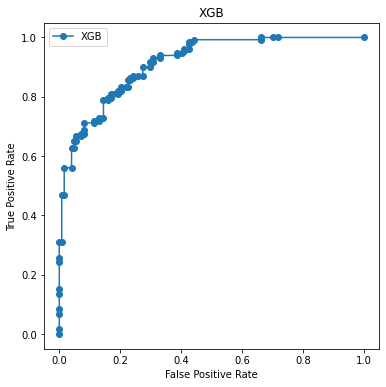

ROC AUC of XGB: 0.9141006842619747


In [ ]:
y_predictProb_xgb = xgb_best.predict_proba(X_test)
y_predictProb_xgb = y_predictProb_xgb[:,1]

fpr, tpr, _ = roc_curve(y_test,y_predictProb_xgb)

#plot graph
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr, marker='o', label='XGB')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB')
plt.legend()
# plt.savefig('/content/drive/MyDrive/AI for drug/block_SGLT2/results/xgb_AUC.jpg', dpi = 800)
plt.show()
print(f'ROC AUC of XGB: {roc_auc_score(y_test,y_predictProb_xgb)}')

In [ ]:
np.random.seed(911)
xgb = xgb.XGBClassifier(
    colsample_bytree = 0.6,
    gamma = 0.3,
    learning_rate = 0.02,
    max_depth = 20,
    n_estimators = 400,
    reg_lambda = 1,
    subsample = 0.6,
).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:41:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
y_pred_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[ 88  36]
 [ 14 118]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       124
           1       0.77      0.89      0.83       132

    accuracy                           0.80       256
   macro avg       0.81      0.80      0.80       256
weighted avg       0.81      0.80      0.80       256



In [ ]:
import json
# xgb.save_model('/content/drive/MyDrive/AI for drug/block_SGLT2/results/xgb_dropduplicates_bioactivity_class.json') 